## Data Analysis with pandas

We are going to examine data from the [Bangalore Open Data Repository](https://github.com/openbangalore/bangalore). Bangalore is the 3rd most populous city in India and widely regarded as the Silicon Valley of India.

### Task 1 - Load Data

- Read in the data to pandas
- Check the shape of the dataframe
- Check the summary statistics of the dataframe
- Change the row index to the "Year" column

In [84]:
import pandas as pd
import numpy as np
data=pd.read_csv("bangalore_temparature.tsv", sep='\t')
print (data.shape)

(102, 13)


In [17]:
print (data.describe())

              Year         Jan         Feb         Mar         Apr  \
count   102.000000  102.000000  102.000000  102.000000  102.000000   
mean   1951.500000   22.122088   24.028069   26.375049   27.844608   
std      29.588849    0.617820    0.732336    0.656179    0.558630   
min    1901.000000   20.699000   22.145000   24.791000   26.725000   
25%    1926.250000   21.768250   23.502250   25.965000   27.452000   
50%    1951.500000   22.187000   24.074000   26.462500   27.899000   
75%    1976.750000   22.476750   24.534000   26.748500   28.213750   
max    2002.000000   23.530000   26.134000   28.048000   29.068000   

              May         Jun         Jul         Aug         Sep         Oct  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    27.108118   24.923186   23.985824   24.125373   24.347304   24.100167   
std      0.636558    0.547904    0.485182    0.373501    0.520555    0.458388   
min     25.378000   23.621000   22.770000   2

In [85]:
data.set_index('Year',inplace=True)
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901,23.094,24.243,25.398,27.740,26.328,24.735,23.969,24.154,25.097,24.301,23.090,21.000
1902,21.588,22.930,26.277,27.442,27.118,25.477,24.428,25.019,23.940,23.759,22.790,22.184
1903,22.296,23.969,26.552,27.764,26.718,25.132,24.004,23.958,23.925,23.587,21.693,20.727
1904,20.982,22.623,25.636,27.510,25.878,23.714,23.278,24.032,24.408,24.185,22.214,21.119
1905,21.740,24.158,26.095,26.977,26.863,25.271,24.453,24.444,24.476,24.007,23.029,21.372


### Task 2 - Initial Data Analysis

- (Chart) How does temperature vary over the year (X-axis is months)?
- (Chart) How does temperature vary over the years (X-axis is years)?
- Which months had the highest and lowest temperatures in 1960?
- What were the highest, lowest and mean values in 1960?
- Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
- Which months had the highest and lowest gains in temperature?
- Make a histogram, KDE plot and bar plot of the gains.

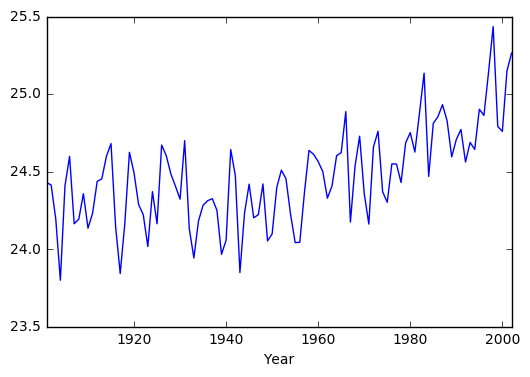

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
#data.plot()
data.transpose().mean().plot()

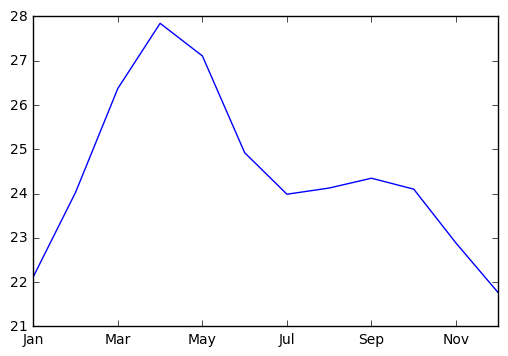

In [53]:
data.mean().plot()

In [67]:
#Which months had the highest and lowest temperatures in 1960?
#print(data[data.index==1960])
#highest temperature in 1960
print(data[data.index==1960].idxmax(axis=1))
#lowest temperature in 1960 was
print(data[data.index==1960].idxmin(axis=1))
#What were the highest, lowest and mean values in 1960?
print(data[data.index==1960].max(axis=1))
print(data[data.index==1960].min(axis=1))
print(data[data.index==1960].mean(axis=1))


Year
1960    Apr
dtype: object
Year
1960    Dec
dtype: object
Year
1960    28.142
dtype: float64
Year
1960    21.814
dtype: float64
Year
1960    24.564083
dtype: float64


In [71]:
#Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
def describe_year(year):
    print(data[data.index==year].max(axis=1))
    print(data[data.index==year].min(axis=1))
    print(data[data.index==year].mean(axis=1))  
describe_year(1960)

Year
1960    28.142
dtype: float64
Year
1960    21.814
dtype: float64
Year
1960    24.564083
dtype: float64


In [92]:
#Which months had the highest and lowest gains in temperature?
gains=(data.iloc[-1]-data.iloc[0])/data.iloc[0]

#highest gains in temperature
print(gains.idxmax())
#lowest gains in temperature?
print(gains.idxmin())

Dec
Feb


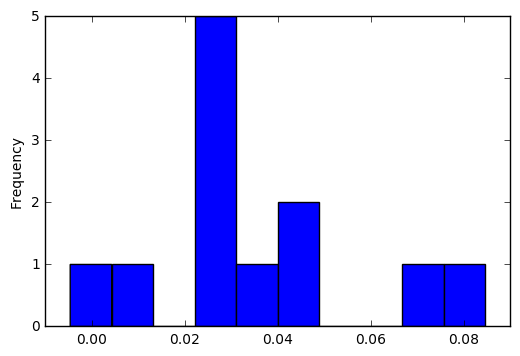

In [96]:
#Make a histogram, KDE plot and bar plot of the gains.
gains.plot(kind='hist')


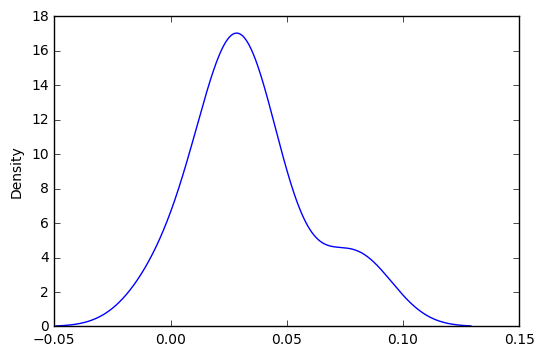

In [98]:
gains.plot(kind='kde')

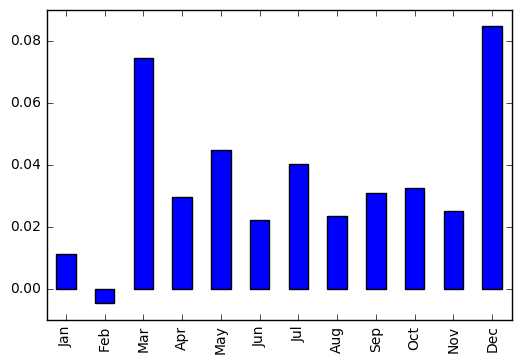

In [99]:
gains.plot(kind='bar')

### Task 3 - Visualization

matplotlib
- Make a histogram for a particular month.
- Compare distributions for 2 months (histograms on subplots).
- Compare two years in the same histogram (use color coding).
- Define a function to compare two months in the same frame.
- Create a box plot for 1 month.
- Create a box plot for 2 months on 1 figure.
- Create a function that compares 2 months via boxplot.

seaborn
- Make a KDE plot of one month.
- Make a function that compares the KDE plots of 2 months.
- Compare the histogram and KDE plots of 2 months on the same figure.
- Create a Facetgrid version of the KDE plots. Loop through a months array.
- Create a violin plot for 1 month.
- Create a violin plot for 2 months on 1 figure.
- Create a function that compares 2 months via violin plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a293cf8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a765940>], dtype=object)

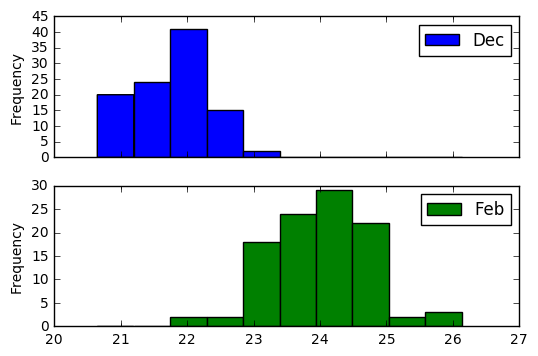

In [105]:
#data['Dec'].plot(kind='hist')
data[['Dec','Feb']].plot(kind='hist',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a9f94a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ab3d2e8>], dtype=object)

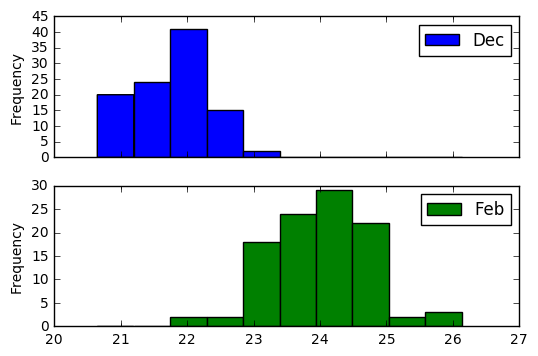

In [107]:
data[['Dec','Feb']].plot(kind='hist',subplots=True)

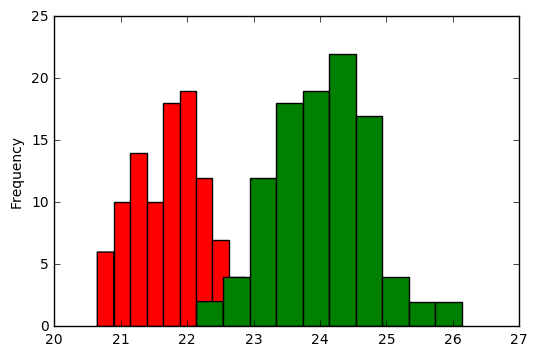

In [110]:
plt.figure()
with pd.plot_params.use('x_compat', True):
    data.Dec.plot(color='r',kind='hist')
    data.Feb.plot(color='g',kind='hist')

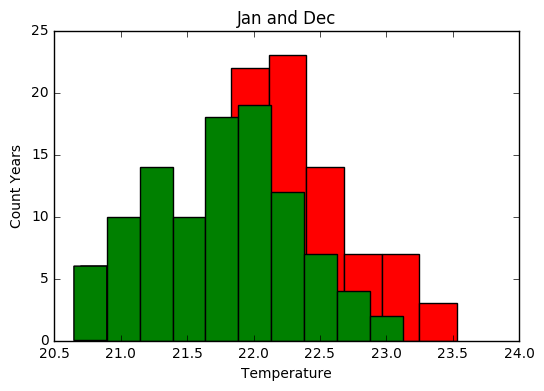

In [116]:
def plot_2month(col1,col2):
    plt.figure()
    with pd.plot_params.use('x_compat', True):
        data[col1].plot(color='r',kind='hist')
        data[col2].plot(color='g',kind='hist')
        plt.xlabel('Temperature')
        plt.ylabel('Count Years')
        plt.title(col1+' and '+col2)
        
plot_2month('Jan', 'Dec')

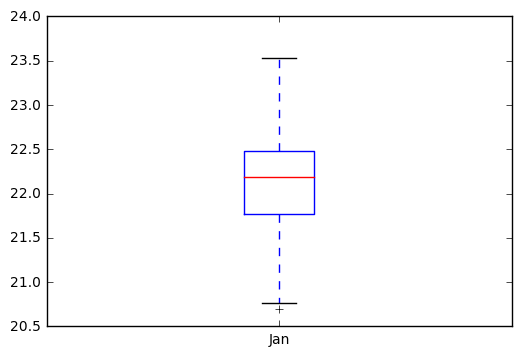

In [118]:
#Create a box plot for 1 month.
data['Jan'].plot(kind='box')

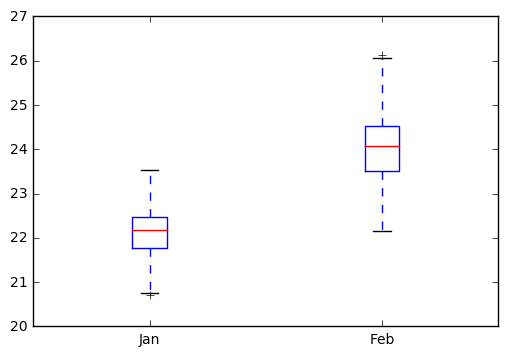

In [120]:
#Create a box plot for 2 months on 1 figure.
data[['Jan','Feb']].plot(kind='box')

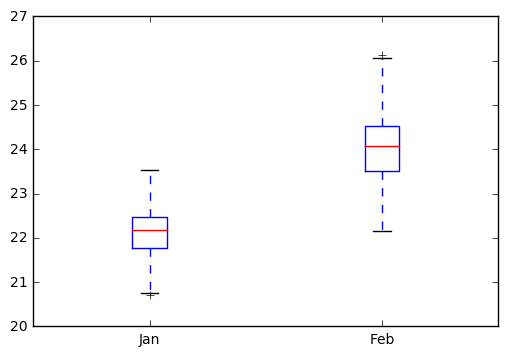

In [123]:
#Create a function that compares 2 months via boxplot.
def boxplot_2month(col1,col2):
    data[[col1,col2]].plot(kind='box')
boxplot_2month('Jan','Feb')

In [126]:
#Make a KDE plot of one month.
import seaborn as sns
#
sns.kdeplot(data['Dec'])
#Make a function that compares the KDE plots of 2 months.
#Compare the histogram and KDE plots of 2 months on the same figure.
#Create a Facetgrid version of the KDE plots. Loop through a months array.
#Create a violin plot for 1 month.
#Create a violin plot for 2 months on 1 figure.
#Create a function that compares 2 months via violin plot.

ImportError: No module named 'seaborn'

### Task 4 - Insight

- Visually represent the varying temperatures over the entire period.
- Find the coldest and warmest months for May over the entire period.